In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [12]:
import importlib

import sys
sys.path.append('/Users/giovanniconcheri/Desktop/ResearchJob/Student-Research-Job/Chebyshev')
sys.path.append('/Users/giovanniconcheri/Desktop/ResearchJob/Student-Research-Job/TCI')
sys.path.append("/home/t30/all/go56vod/Desktop/Student-Research-Job/Chebyshev")
sys.path.append("/home/t30/all/go56vod/Desktop/Student-Research-Job/TCI")


import TCI_Lsite_accumulative_v1 as TCI

In [6]:
#Load
file_names = ["S_ferro.pkl", "S_para.pkl", "Corr_ferro.pkl", "Corr_para.pkl"]
loaded_data = []

for file in file_names:
    with open(file, "rb") as f:
        loaded_data.append(pickle.load(f))

S_ferro = loaded_data[0]
S_para = loaded_data[1]
Corr_ferro = loaded_data[2]
Corr_para = loaded_data[3]

Plot of entanglement entropy

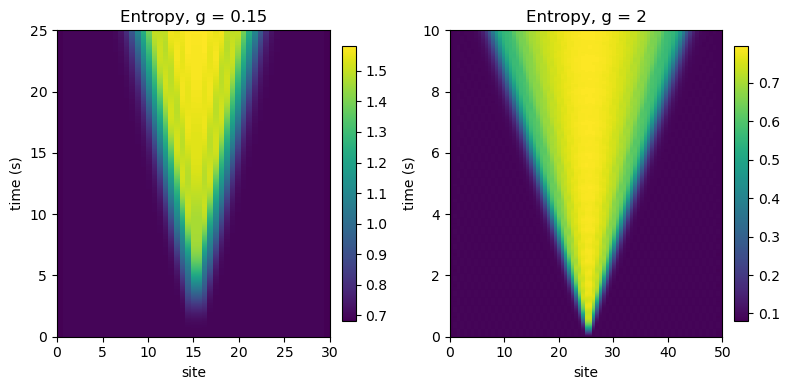

In [7]:
rows = 1
cols = 2
fig, ax = plt.subplots(rows, cols, figsize = (8,4))

im = ax[0].imshow(S_ferro, aspect='auto', interpolation='none', origin = 'lower',  extent = [0, 30, 0, 25])
fig.colorbar(im, ax=ax[0], fraction=0.046, pad=0.04)  # Add colorbar
ax[0].set_title('Entropy, g = 0.15')
ax[0].set(xlabel = 'site', ylabel = 'time (s)')

im = ax[1].imshow(S_para, aspect='auto', interpolation='none', origin = 'lower',  extent = [0, 50, 0, 10])
fig.colorbar(im, ax=ax[1], fraction=0.046, pad=0.04)  # Add colorbar
ax[1].set_title('Entropy, g = 2')
ax[1].set(xlabel = 'site', ylabel = 'time (s)')

plt.tight_layout()

In [20]:
L = 50
D = L
n = 11
N = 2**n
print(N)

Corr_ferro = np.array(Corr_ferro[:N, :])
print(Corr_ferro.shape)
func_vals = Corr_ferro #Cs is in the form (X,T)

#first we define the function f(t)
# which returns the slice of func_vals along x for a specific time 
f_t = lambda *t: Corr_ferro.T.reshape((D,) + (2,) * n)[:,*t]

2048
(2048, 50)


In [21]:
#here we have to define func as the initialization of the class
func_acc = TCI.function(f_t)

As, _, eval, err_2, err_max, func_interp = TCI.accumulative_tensor_cross_interpolation(func_acc,         # function to be interpolated
                                   func_vals,    
                                   D,
                                   L=n,          # number of MPS tensors
                                   iters=5)       # number of back-and-forth sweeps

print(np.linalg.norm(func_vals), np.max(np.abs(func_vals)))

err_max:  0.00010592811266653591
err_2:  9.522067296483074e-05

repeated evaluations:  4108
unique evaluations 408
unique + repeated:  4516
total evaluations:  4516

25.275298121939237 1.000000000000071
